# Heart attack prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Goal

#### Current Cost

The goal of this project is to reduce the costs associated to heart attacks in the national healthcare system by a 20%. The current cost per person is:

$$ Current cost = (1-HA) * (CostNHA) + HA * (CostHA) = 4709.3€ $$

$$ Current cost = 0.905799 * 0 + 0.094186 * 50000 = 4709.3€ $$

HA = Heart attack probability = 0.094186

CostHA = Cost of one person having a heart attack = 50000

CostNHA = Cost of one person not having a heart attack = 0

#### After plan cost

The cost per person after applying this program has several branches:
* People that won't have a HA but were diagnosed to have one and accept to follow the plan -> Cost: 1.000€
$$ C1 = FPP * 1.000€ $$

* People that will have a heart attack but were diagnosed not to have one -> Cost: 50.000€
$$ C2 = FNP * 50.000€ $$

* People that will have a heart attack, are diagnosed to have one and decide not to take the plan -> Cost: 50.000€
$$ C3 = TPP * (1- P(takesplan)) * 50.000€ $$

* People that will have a heart attack, are diagnosed to have one and decide to take the plan, and they don't adhere to it -> Cost: 51.000€
$$ C4 = TPP * P(takesplan) * (1-P(adheresplan)) * 51.000€ $$

* People that will have a heart attack, are diagnosed to have one and decide to take the plan, they adhere to it, and it doesn't work -> Cost: 51.000€
$$ C5 = TPP * P(takesplan) * P(adheresplan) * (1-P(planworks)) * 51.000€ $$

* People that will have a heart attack, are diagnosed to have one and decide to take the plan, they adhere to it, and it works -> Cost: 1.000€
$$ C6 = TPP * P(takesplan) * P(adheresplan) * P(planworks) * 1.000€ $$

FPP = False Positive Percentage = TN / Total Cases

FNP = False Negative Percentage = FN / Total Cases

TPP = True Positive Percentage = TP / Total Cases

P(takesplan) = Probability that someone takes the plan when is offered to him/her = 0.85

P(adheresplan) = Probability that someone adheres to the plan = Unknown

P(planworks) = Probability that the plan works = 0.75

#### Formula
We need to do a cost analysis to check the minimum percentage of adherence that we need in order to reduce the cost by 20%, that means, we need to get the value of P(adheresplan) so that the cost is equal than 80% of the current cost.

$$ Currentcost * 0.8 = Newcost $$
$$ Currentcost * 0.8 - (c1 + c2 + c3) = c4 + c5 + c6 $$

$$ (Currentcost * 0.8 - (c1 + c2 + c3)) / (TPP*P(takesplan)) = $$
$$ =((1-P(adheresplan))*51000) + (P(adheresplan)*(1-(P(planworks))*51000) + (P(adheresplan)*P(planworks)*1000) = $$
$$ = 51000-51000*P(adheresplan) + P(adheresplan)*(1-P(planworks))*51000) + (P(adheresplan)*P(planworks)*1000) $$

$$ ((Currentcost * 0.8 - (c1 + c2 + c3)) / (TPP*P(takesplan)) - 51000)/ P(adheresplan) = $$
$$ = -51000 + (1-P(planworks))*51000) + P(planworks)*1000) $$

$$ P(adheresplan) = $$
$$ = ((Currentcost * 0.8 - (c1 + c2 + c3)) / (TPP*P(takesplan)) - 51000)/ (-51000 + (1-P(planworks))*51000) + P(planworks)*1000)) = $$
$$ = ((Currentcost * 0.8 - (c1 + c2 + c3)) / (TPP*P(takesplan)) - 51000)/ (-P(planworks))*51000) + P(planworks)*1000))$$
$$ = ((Currentcost * 0.8 - (c1 + c2 + c3)) / (TPP*P(takesplan)) - 51000)/ (-P(planworks))*50000)))$$


In [3]:
def minimum_adheresplan_prob(fpp, fnp, tpp, p_takesplan=0.85, p_planworks=0.75):
    nha = (df.HeartAttack.value_counts()/len(df))[0]
    ha = 1-nha
    
    current_cost = ha*50000 + nha*0
    target_new_cost = 0.8 * current_cost
    
    print(f"We need a to reduce the cost per person to {target_new_cost}€\n")
    
    c1 = nha * fpp * 1000
    c2 = ha * fnp * 50000
    c3 = ha * tpp * (1-p_takesplan) * 50000
    
    p_adheresplan = (((target_new_cost - (c1+c2+c3)) / (tpp*p_takesplan)) - 51000) / (-p_planworks*50000)
    
    print(f"The minimum adherence rate plan to reduce the cost by 20% is {p_adheresplan}\n")
    
    return p_adheresplan

In [4]:
minimum_adheresplan_prob(0.01, 0.001, 0.09)

We need a to reduce the cost per person to 3768.0542415641758€

The minimum adherence rate plan to reduce the cost by 20% is 0.07348138666798575



0.07348138666798575

## Load the dataset 

In [5]:
df = pd.read_csv("heart_disease.csv")

### Data exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HeartAttack        253676 non-null  float64
 1   HighBP             253679 non-null  float64
 2   HighChol           253679 non-null  float64
 3   CholCheck          253679 non-null  float64
 4   BMI                253679 non-null  float64
 5   Smoker             253679 non-null  float64
 6   Stroke             253679 non-null  float64
 7   Diabetes           253680 non-null  float64
 8   PhysActivity       253680 non-null  float64
 9   Fruits             253679 non-null  float64
 10  Veggies            253679 non-null  float64
 11  HvyAlcoholConsump  253679 non-null  float64
 12  GenHlth            253680 non-null  float64
 13  MentHlth           253679 non-null  float64
 14  PhysHlth           253680 non-null  float64
 15  DiffWalk           253680 non-null  float64
 16  Se

In [7]:
df.HeartAttack.value_counts()

0.0    229783
1.0     23893
Name: HeartAttack, dtype: int64

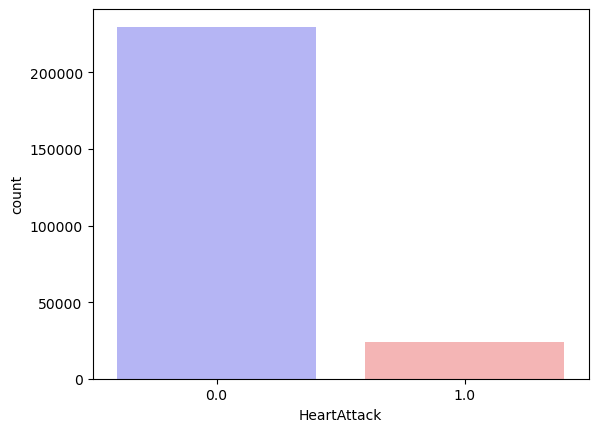

In [8]:
sns.countplot(x="HeartAttack", data=df, palette="bwr")
plt.show()

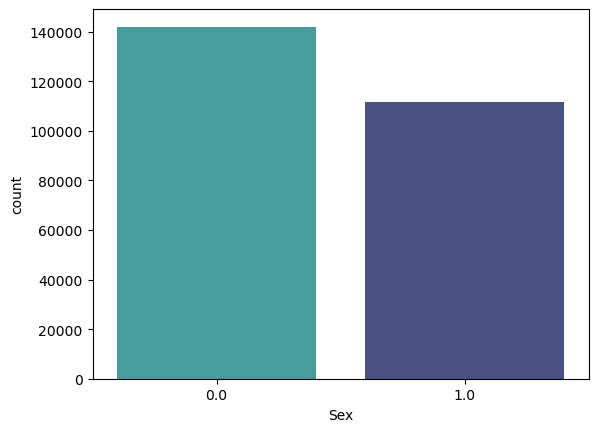

In [9]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.show()

In [10]:
df.groupby('HeartAttack').mean()
# not sure how this adds value

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartAttack,,,,,,,,,,,,,,,,,,,
0.0,0.395592,0.395331,0.959966,28.270060,0.424833,0.027657,0.256342,0.768630,0.637326,0.816356,0.058347,2.422359,3.030094,3.731329,0.142565,0.426559,7.813716,5.082116,6.148035
1.0,0.750345,0.701168,0.988658,29.466622,0.619470,0.164776,0.687231,0.640355,0.604696,0.763906,0.035492,3.367555,4.670322,9.154439,0.414975,0.572887,10.131210,4.745971,5.148161


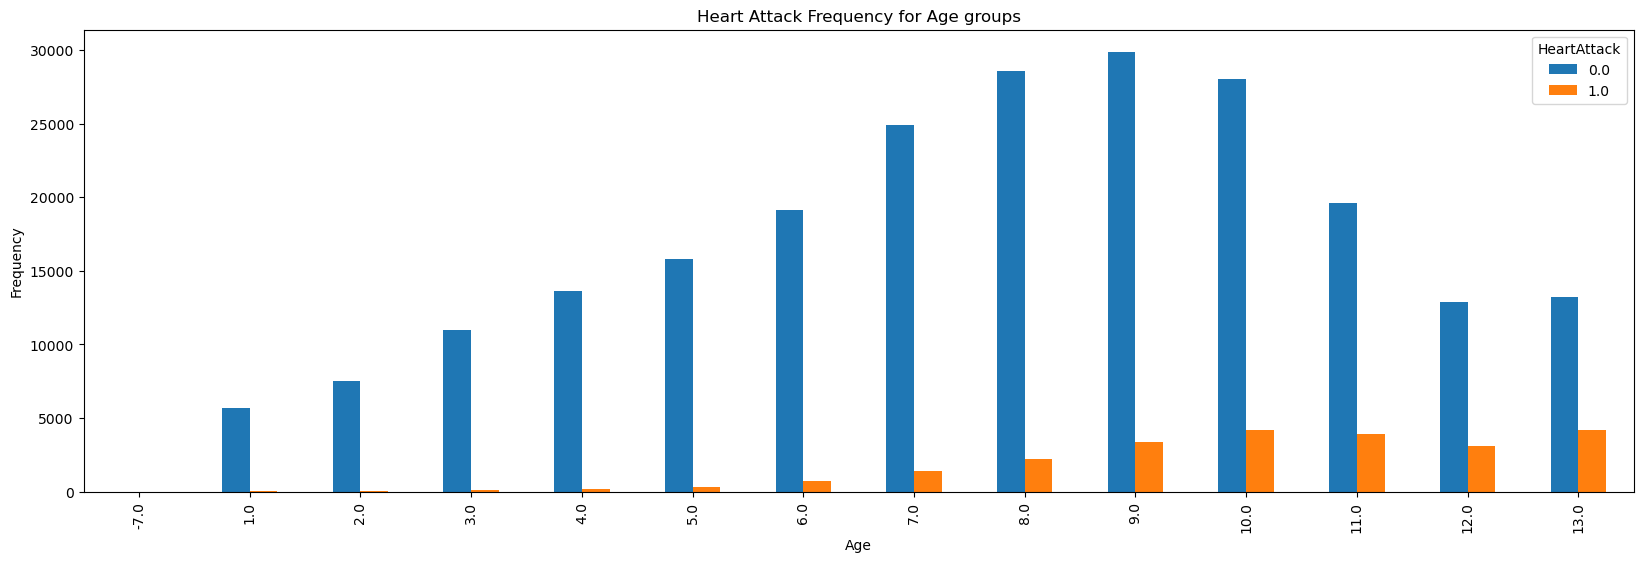

In [11]:
pd.crosstab(df.Age,df.HeartAttack).plot(kind="bar",figsize=(20,6))
plt.title('Heart Attack Frequency for Age groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

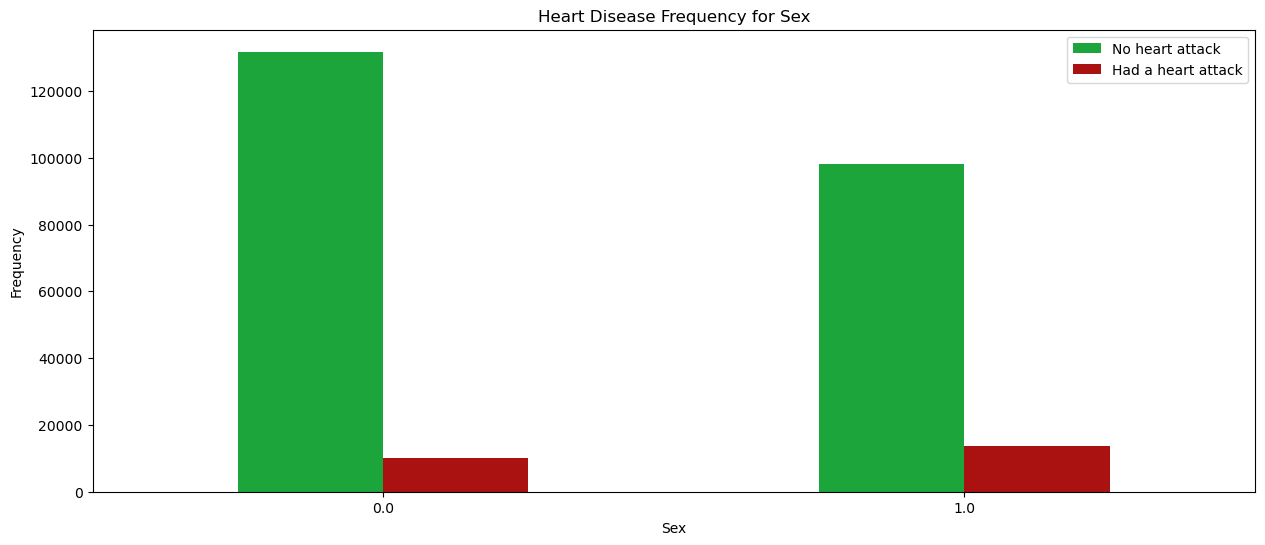

In [12]:
pd.crosstab(df.Sex,df.HeartAttack).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["No heart attack", "Had a heart attack"])
plt.ylabel('Frequency')
plt.show()

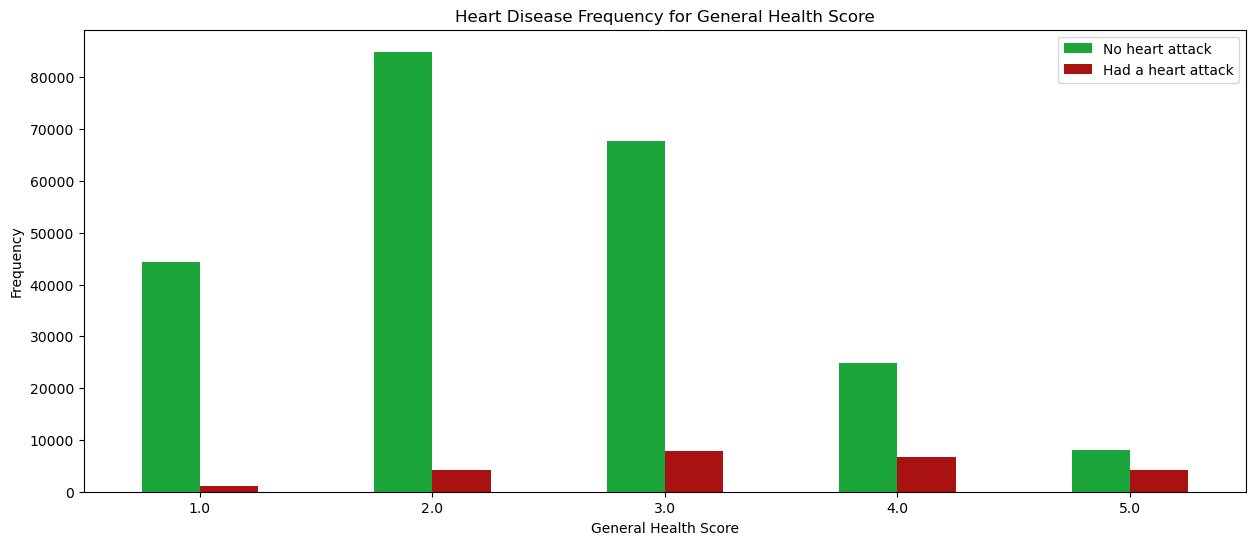

In [13]:
pd.crosstab(df.GenHlth,df.HeartAttack).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for General Health Score')
plt.xlabel('General Health Score')
plt.xticks(rotation=0)
plt.legend(["No heart attack", "Had a heart attack"])
plt.ylabel('Frequency')
plt.show()

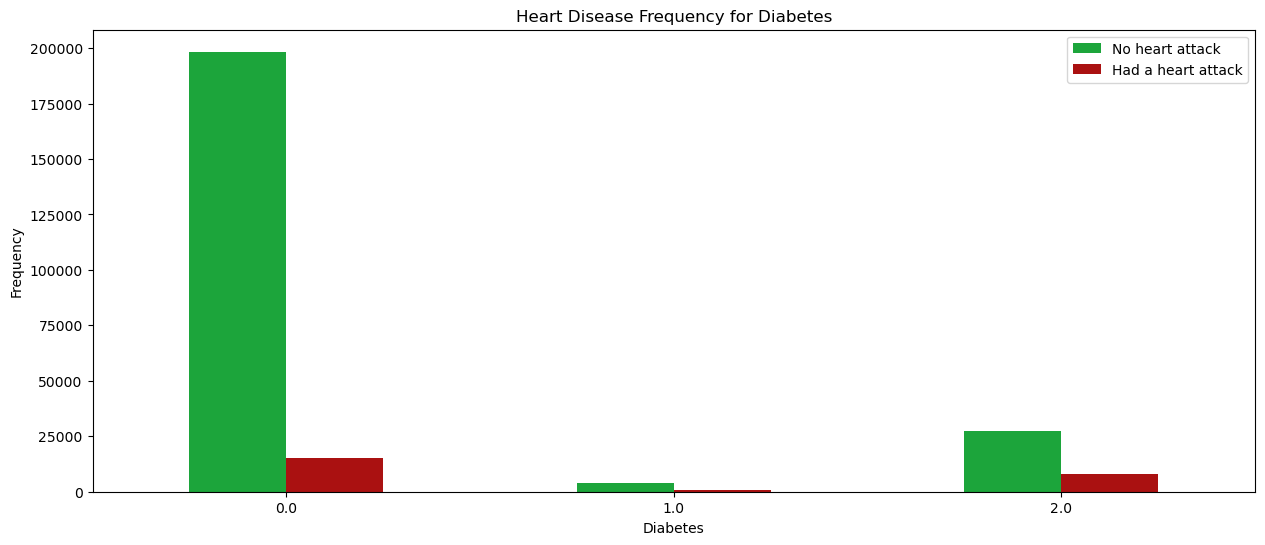

In [14]:
pd.crosstab(df.Diabetes,df.HeartAttack).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Diabetes')
plt.xlabel('Diabetes')
plt.xticks(rotation=0)
plt.legend(["No heart attack", "Had a heart attack"])
plt.ylabel('Frequency')
plt.show()

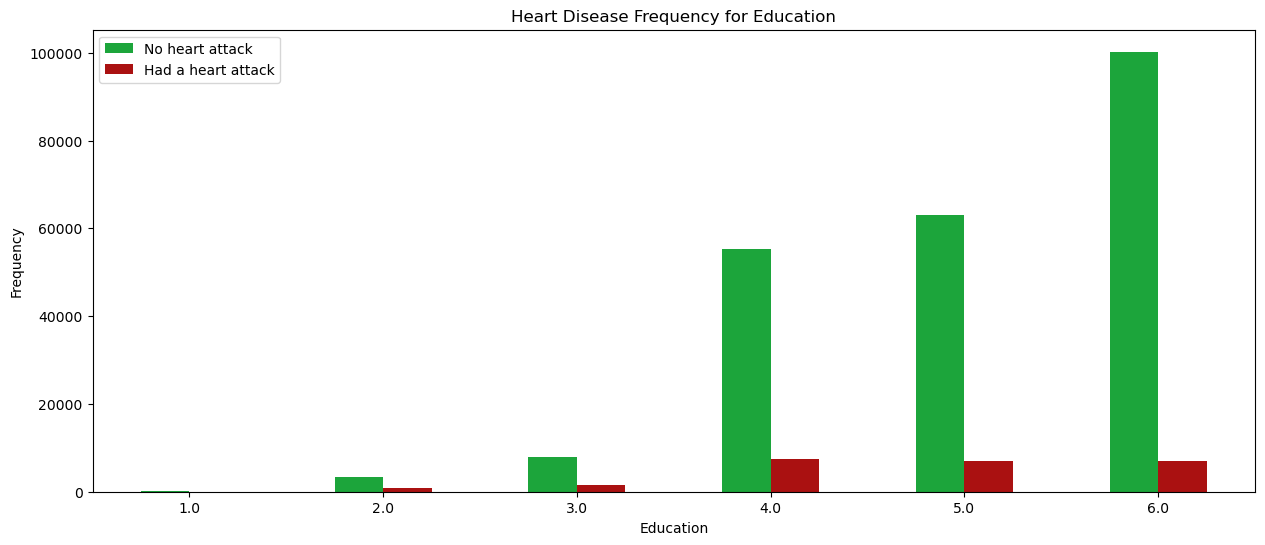

In [15]:
pd.crosstab(df.Education,df.HeartAttack).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Education')
plt.xlabel('Education')
plt.xticks(rotation=0)
plt.legend(["No heart attack", "Had a heart attack"])
plt.ylabel('Frequency')
plt.show()

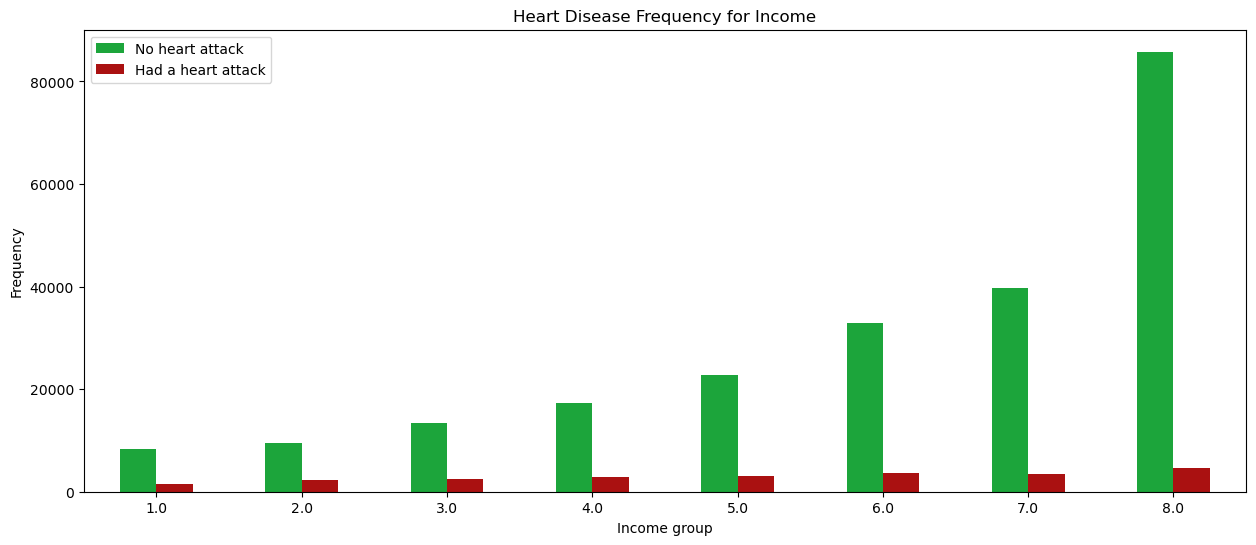

In [16]:
pd.crosstab(df.Income,df.HeartAttack).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Income')
plt.xlabel('Income group')
plt.xticks(rotation=0)
plt.legend(["No heart attack", "Had a heart attack"])
plt.ylabel('Frequency')
plt.show()

## Data Cleaning & Preprocessing

In [17]:
df.head()

,HeartAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [18]:
(df.HeartAttack.value_counts()/len(df))[0]

0.9057986439608956

### Problems found in the data and actions taken
- **Problem:** some null values in the data. **Action:** we droped those rows as werent that many
- **Problem:** two age values were negative **Action:** doped as they were only two
- **Problem:** diabetes was suposed to be binary but it has values 0, 1, and 2. **Action:** it was splited into two columns diabetes_1 and diabetes_2 inicating diabetes type 1 and type 2 respectively and both binary


In [19]:
def isDiabetes1(row):
    if row['Diabetes']==1:
        return 1.0
    return 0.0
def isDiabetes2(row):
    if row['Diabetes']==2:
        return 1.0
    return 0.0

In [20]:
# The amount of missing values is not considerable enough to do a more precise cleaning
df = df.dropna()
# Removing negative values from age 
df = df[df.Age > 0]
# Adding diabetes_1 and diabetes_2
df["diabetes_1"] = df.apply(lambda row: isDiabetes1(row), axis=1)
df["diabetes_2"] = df.apply(lambda row: isDiabetes2(row), axis=1)
df = df.drop('Diabetes',axis=1)
df = df.drop('MentHlth', axis=1)
df = df.drop('PhysHlth', axis=1)
df.tail()

,HeartAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Education,Income,diabetes_1,diabetes_2
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,5.0,6.0,7.0,0.0,0.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,11.0,2.0,4.0,0.0,1.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,2.0,0.0,0.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,7.0,5.0,1.0,0.0,0.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,9.0,6.0,2.0,0.0,1.0


In [21]:
y = df.HeartAttack
x = df.drop('HeartAttack', axis=1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [23]:
accuracies = {}


#### Logistic regression

In [24]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 90.49%


#### KNN 

/home/mac/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mac/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

/home/mac/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mac/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

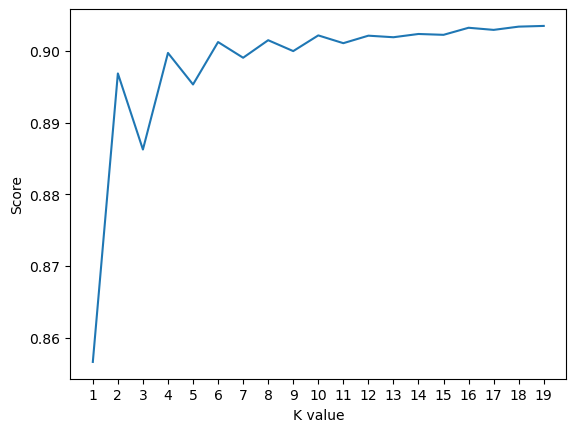

Maximum KNN Score is 90.35%


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 81.61%


In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 85.22%


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 89.51%


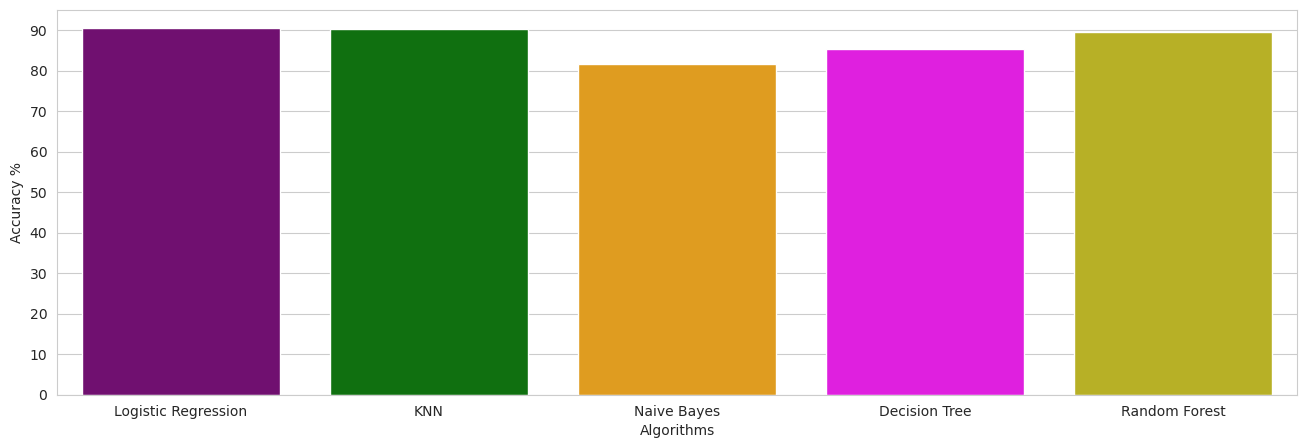

In [29]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### Modeling

In [30]:
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)

/home/mac/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

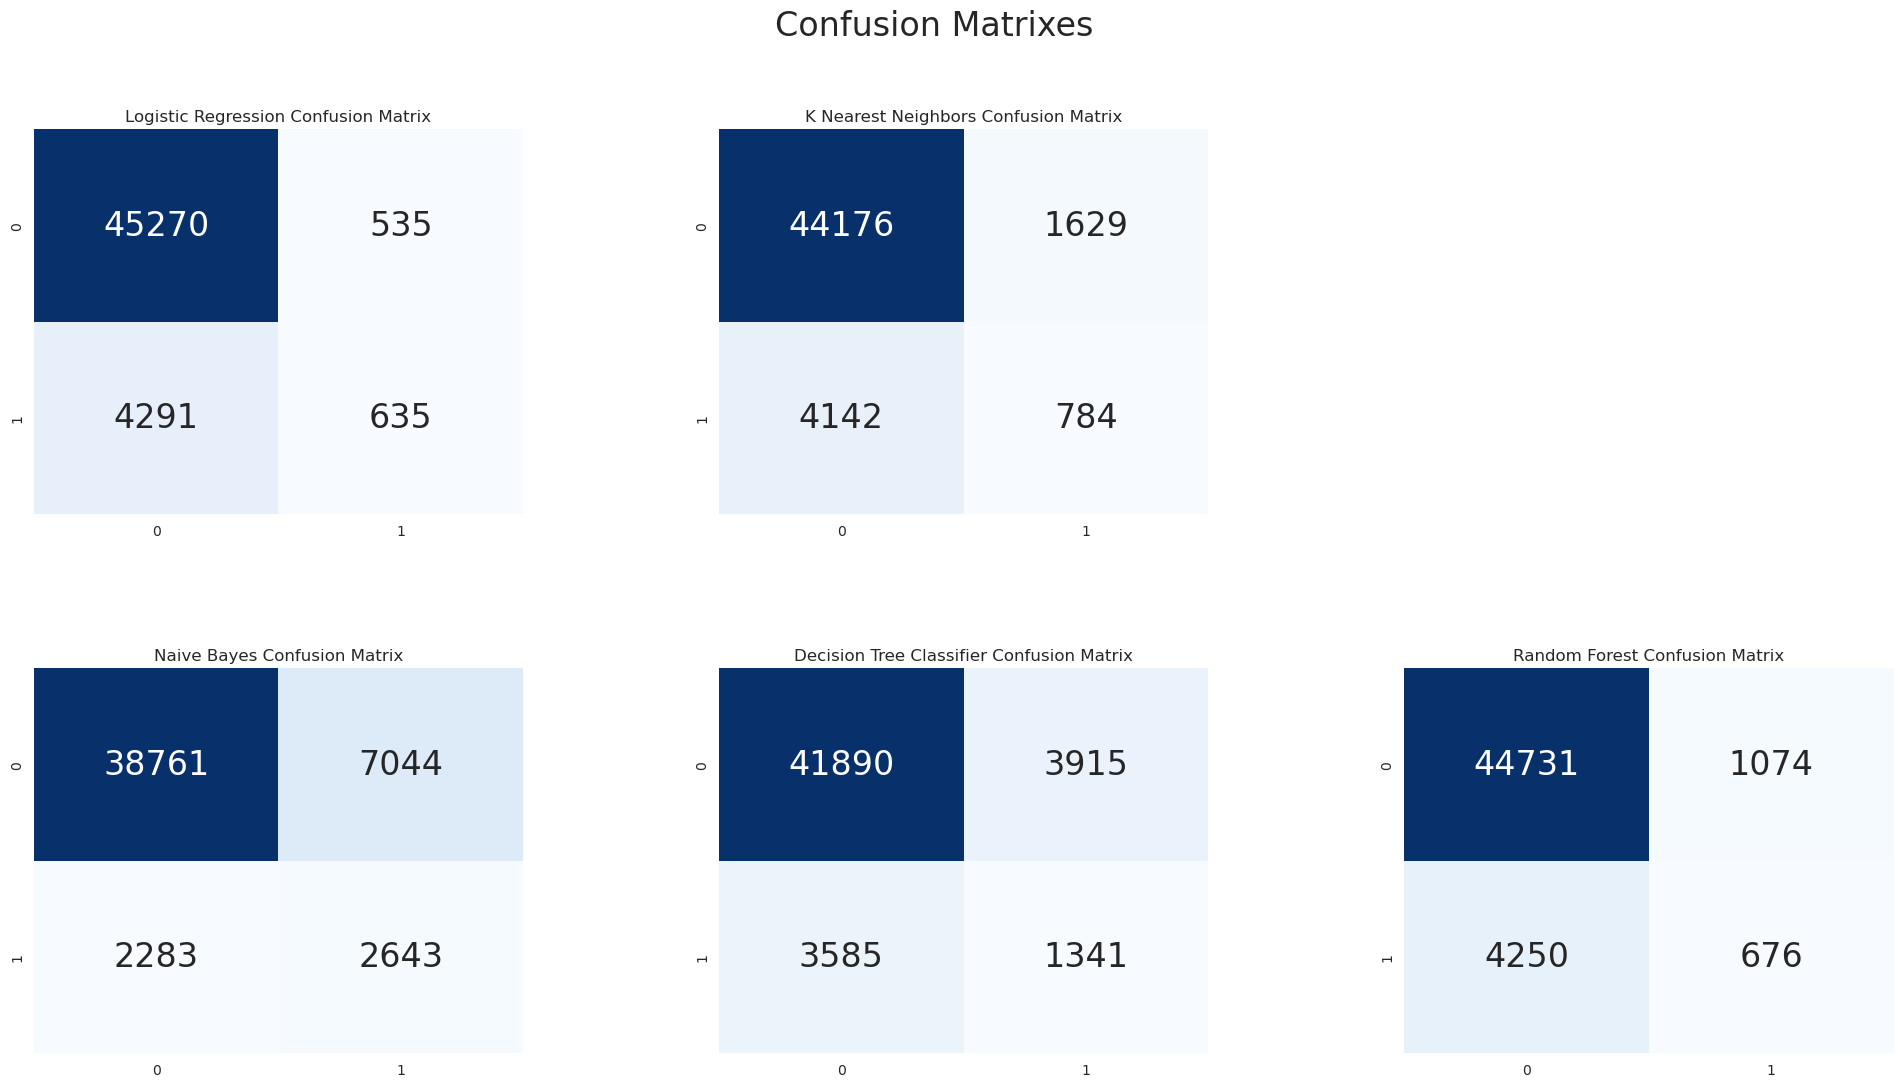

In [32]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()